1. Воспроизводим пример из книги https://drive.google.com/file/d/18V_Af3NA7Lg73s8jmWUgBew88C0JjQHv/view?usp=sharing, из параграфов 14.2, 14.3 .

Пример состоит в обучении модели классификации на основе алгоритма k-ближайших соседей

In [1]:
from sklearn.datasets import load_digits # импортируем датасет с рукописными цифрами

In [2]:
digits = load_digits() # загружаем датасет

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Наблюдаем структуру данных

In [4]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.target.shape

(1797,)

In [7]:
digits.images[13]

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [38]:
import matplotlib.pyplot as plt
import numpy as np

Подготавливаем визуализацию

numpy.ndarray

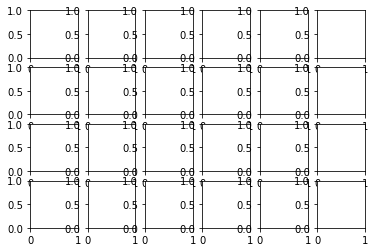

In [20]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))
type(axes)

Визуализируем данные

In [21]:
for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([]) 
    axes.set_title(target)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

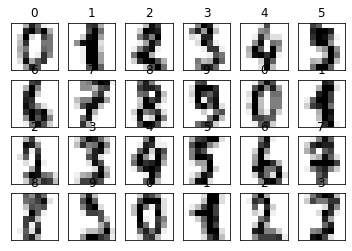

In [23]:
figure

Делим выборку на обучающую и тестовую

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

In [26]:
X_train.shape

(1347, 64)

In [27]:
X_test.shape

(450, 64)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11, test_size=0.20)

Импортируем классификатор на основе метода K-ближайших соседей

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier()

Обучаем классификатор

In [32]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

Наблюдаем результаты модели на тестовой выборке при помощи различных методик

In [33]:
predicted = knn.predict(X=X_test)

In [34]:
expected = y_test

In [35]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [42]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
wrong

[(5, 3), (8, 9), (4, 9), (7, 3), (7, 4)]

In [43]:
print(f'{knn.score(X_test, y_test):.2%}')

98.61%


In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]], dtype=int64)

In [46]:
from sklearn.metrics import classification_report

In [47]:
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [50]:
import pandas as pd
import seaborn as sns

In [49]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

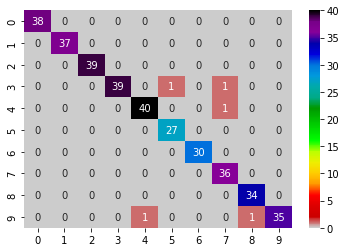

In [51]:
axes = sns.heatmap(confusion_df, annot=True, cmap='nipy_spectral_r')

In [52]:
from sklearn.model_selection import KFold

In [53]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

In [55]:
from sklearn.model_selection import cross_val_score

In [57]:
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98882682])

In [58]:
print(f'Mean accuracy: {scores.mean():.2%}')

Mean accuracy: 98.78%


In [59]:
print(f'Accuracy standard deviation: {scores.std():.2%}')

Accuracy standard deviation: 0.74%


Сравниваем метод К-ближайших соседей с другими классификаторами

In [61]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [62]:
estimators = {'KNeighborsClassifier': knn,'SVC': SVC(gamma='scale'),'GaussianNB': GaussianNB()}

In [63]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.78%; standard deviation=0.74%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


Наблюдаем изменение точности метода К-ближайших соседей в зависимости от параметра К

In [64]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' + f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=98.83%; standard deviation=0.58%
k=3 ; mean accuracy=98.83%; standard deviation=0.72%
k=5 ; mean accuracy=98.78%; standard deviation=0.74%
k=7 ; mean accuracy=98.44%; standard deviation=0.96%
k=9 ; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.33%; standard deviation=0.90%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.83%; standard deviation=0.95%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%
